In [27]:
# Data-handling libraries
import pandas as pd
import numpy as np

# Graphing libraries
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

# Modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Options
pd.set_option('display.max_rows', 100)

# Data import

## Read in data

In [28]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

# Data cleaning

## Merge for easier cleaning

This ensures that (a) we'll only have to clean once and (b) that differences in values between the train and test sets won't affect the analysis.

In [29]:
train["Dataset"] = "train"
test["Dataset"] = "test"

ames = pd.concat([train, test], ignore_index=True)
ames = ames[train.columns] # restore original column order
ames.name = "ames"

## Check data integrity

In [30]:
display(ames.shape)

(2929, 82)

In [31]:
display(ames.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [32]:
display(ames.head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Dataset
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500.0,train
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000.0,train
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000.0,train
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000.0,train
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500.0,train


### Check data types

In [33]:
display(pd.concat({
    "Type": ames.dtypes,
    "Init. value": ames.iloc[0, :]
}, axis=1))

,Init. value,Type
Id,109,int64
PID,533352170,int64
MS SubClass,60,int64
MS Zoning,RL,object
Lot Frontage,NaN,float64
Lot Area,13517,int64
Street,Pave,object
Alley,NaN,object
Lot Shape,IR1,object
Land Contour,Lvl,object


Problem rows: `Alley` (recast `NaN` to string), `Central Air` (make boolean), `Bsmt Full Bath` (should be int), `Bsmt Half Bath` (should be int), `Garage Yr Blt` (should be int), `Garage Cars` (should be int).

Several columns express Likert scales, some numeric (`Overall Qual`, `Overall Cont`) and some nominal (`Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `HeatingQC`, `KitchenQual`, `FireplaceQu`, `Garage Qual`, `Garage Cond`, `Pool QC`). It is not clear whether (a) these scales are mutually comparable (though likely they are, especially if the assessors were the same) or (b) they can be meaningfully treated as numeric quantities. Norman (2010) notes that:

> [...] while Likert questions or items may well be ordinal, Likert scales, consisting of sums across many items, will be interval. It is completely analogous to the everyday, and perfectly defensible, practice of treating the sum of correct answers on a multiple choice test, each of which is binary, as an interval scale.

and goes on to show that robust models, including linear regressions, can be computed on Likert-scale data.

Thus, I normalize all Likert-scaled columns to be numeric scales starting at 1, although scales with different items are not treated as commensurate.

### Check data values

In [34]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2929.0,1.465255e+03,8.460033e+02,1.0,733.0,1465.0,2.198000e+03,2.930000e+03
PID,2929.0,7.143984e+08,1.887291e+08,526301100.0,528477020.0,535453210.0,9.071811e+08,1.007100e+09
MS SubClass,2929.0,5.738648e+01,4.264528e+01,20.0,20.0,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2439.0,6.919967e+01,2.333768e+01,21.0,58.0,68.0,8.000000e+01,3.130000e+02
Lot Area,2929.0,1.013770e+04,7.861902e+03,1300.0,7440.0,9434.0,1.155300e+04,2.152450e+05
Overall Qual,2929.0,6.093547e+00,1.409420e+00,1.0,5.0,6.0,7.000000e+00,1.000000e+01
Overall Cond,2929.0,5.563332e+00,1.111678e+00,1.0,5.0,5.0,6.000000e+00,9.000000e+00
Year Built,2929.0,1.971344e+03,3.024335e+01,1872.0,1954.0,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2929.0,1.984258e+03,2.085924e+01,1950.0,1965.0,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2906.0,1.016696e+02,1.787242e+02,0.0,0.0,0.0,1.640000e+02,1.600000e+03


In [35]:
# Check for inconsistencies within rows
def inconsistency(lesser, greater):
    display(ames[ames[lesser] < ames[greater]][[lesser, greater]])

inconsistency("Year Remod/Add", "Year Built") # remodeled before built
inconsistency("Yr Sold", "Year Built") # sold before built

inconsistency("TotRms AbvGrd", "Bedroom AbvGr") # more bedrooms than total rooms
inconsistency("TotRms AbvGrd", "Kitchen AbvGr") # more kitchens than total rooms

inconsistency("Lot Area", "1st Flr SF") # building bigger than lot
inconsistency("Lot Area", "2nd Flr SF") # building bigger than lot
inconsistency("Lot Area", "Garage Area") # garage bigger than lot
inconsistency("Lot Area", "Open Porch SF") # porch bigger than lot
inconsistency("Lot Area", "Pool Area") # pool bigger than lot (the American dream??)

,Year Remod/Add,Year Built
1003,2001,2002


,Yr Sold,Year Built
1885,2007,2008


,TotRms AbvGrd,Bedroom AbvGr


,TotRms AbvGrd,Kitchen AbvGr


,Lot Area,1st Flr SF


,Lot Area,2nd Flr SF


,Lot Area,Garage Area


,Lot Area,Open Porch SF


,Lot Area,Pool Area


In [36]:
# Look at implausible years
display(ames[ames["Garage Yr Blt"] > 2020][["Garage Yr Blt"]])

# Look at extreme lot areas
display(ames[ames["Lot Area"] > 80000][["Lot Area"]])

# Check for inconsistent years
display(ames[(ames["Year Built"] > ames["Year Remod/Add"]) |
              (ames["Year Built"] > ames["Yr Sold"])]
        [["Year Built", "Year Remod/Add", "Yr Sold", "Mo Sold"]])

,Garage Yr Blt
1699,2207.0


,Lot Area
471,159000
694,115149
2264,215245
2357,164660


,Year Built,Year Remod/Add,Yr Sold,Mo Sold
1003,2002,2001,2009,4
1885,2008,2009,2007,10


In one row, `Garage Yr Blt` has a value of 2207—this is almost certainly a typo for 2007, the year it was remodeled (or else it's for parking the spaceships in). There are two outsized lots, both in the Clear Creek neighborhood: one of 115,149 sq. ft. (2.64 acres) and one of 159,000 sq. ft. (3.65 acres). As Clear Creek appears to be on the purlieu of Ames, and both lots are on cul-de-sacs, these are not implausible and may stand.

Two rows have `Year Built` values which exceed the years in which the homes were sold or remodeled, albeit by only a year in either case. Since these dates are in such close proximity, it is unclear where the error is. It is probably best to let these stand, as they are unlikely to affect the model. (The garage value, however, would be an extreme outlier and certainly bears fixing.)

In [37]:
# Fix erroneous value
ames.at[1699, "Garage Yr Blt"] = 2007

In [38]:
# Check for NaN values and spurious zeroes
missing = ames.loc[:, ames.isna().any() | (ames==0).any()]

display(pd.concat({
    "Type": missing.dtypes,
    "NaNs": missing.isna().sum(),
    "Zeroes": (missing==0).sum()
}, axis=1))

# Total rows with at least one NaN:
display((ames.isna().sum(axis=1) != 0).sum())

# Total rows with at least one zero:
display(((ames==0).sum(axis=1) != 0).sum())

,NaNs,Type,Zeroes
Lot Frontage,490,float64,0
Alley,2731,object,0
Mas Vnr Type,23,object,0
Mas Vnr Area,23,float64,1748
Bsmt Qual,80,object,0
Bsmt Cond,80,object,0
Bsmt Exposure,83,object,0
BsmtFin Type 1,80,object,0
BsmtFin SF 1,1,float64,930
BsmtFin Type 2,81,object,0


2929

2929

Every single row in this data set contains a `NaN` and a zero, so clearly simply dropping these rows is not an option. Rather, we'll have to go columnwise and substitute menaingful alternate values for these missing ones. A few columns, such as `Pool QC` and `Alley`, have nearly no values at all—these, nevertheless, may still have some predictive value (perhaps alley access is indicative of a denser neighborhood). Contrariwise, a few (`Bedroom AbvGr`, `Kitchen AbvGr`) have only a handful of missing values each; these lacunae can probably be filled in at random without affecting the model (given, as we are betting, that they are not price outliers).



## Fix data

### Normalize Likert scales

In [39]:
likert = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0}

for col in ["Exter Qual", "Exter Cond", "Bsmt Qual",
            "Bsmt Cond","Heating QC", "Kitchen Qual",
            "Fireplace Qu", "Garage Qual", "Garage Cond", "Pool QC"]:
    ames[col] = pd.to_numeric(ames[col].map(likert), errors="coerce")

### Fill `NaN` values

In [40]:
# ames["Pool QC"].value_counts()
# ames["Fireplace Qu"].value_counts()
# ames["Lot Frontage"].value_counts()
# ames["Garage Yr Blt"].value_counts()
# ames["Garage Qual"].value_counts()
# ames["Garage Cond"].value_counts()
# ames["Bsmt Qual"].value_counts()
# ames["Bsmt Cond"].value_counts()
# ames["Mas Vnr Area"].value_counts()


# Not all of these zeroes are meaningful,
# but they shouldn't affect the model terribly.

# These are Likert values; we interpret NaN as "no data" and fill with
# the median. This rougly accords with how these NaN values pattern,
# with the exception of "Pool QC" for which there are next to no data
# points to begin with.
for col in [
    "Pool QC",      # 2916 NaN values
    "Fireplace Qu", # 1422 NaN values
    "Garage Qual",  # 159 NaN values
    "Garage Cond",  # 159 NaN values
    "Bsmt Qual",    # 80 NaN values
    "Bsmt Cond",    # 80 NaN values
    ]:
    ames[col] = ames[col].fillna(3)

for col in [
    "Lot Frontage",  # 490 NaN values
    "Garage Yr Blt", # 159 NaN values
    "Mas Vnr Area",  # 23 NaN values
    ]:
    ames[col] = ames[col].fillna(np.mean(ames[col]))

# A few rows have several unique NaN values---all in train, best to drop
ames = ames.drop(1327)
ames = ames.drop(616)
ames = ames.drop(1712)
# ames.isna().any().any()

## Split dataset

In [41]:
train = ames[ames["Dataset"]=="train"]
test = ames[ames["Dataset"]=="test"]

## Create data dictionary

In [42]:
dataset_name = "Ames"
ames.name = "ames"

# Function to facilitate printing markdown tables
def markdowntable(cols, boldcols):
    """Format list of objects as row in markdown table"""
    cols = list(map(str, cols))
    for i in boldcols:
        cols[i] = f"**{cols[i]}**"
    return "|" + " | ".join(cols)

def data_dictionary(*tables):
    """Generate a data dictionary for a given data frame"""
    datadict = ""
    
    # The table header row
    datadict += markdowntable(["Dataset", "Table", "Column", "Type", "Dimensions", "Description"], [])
    datadict += "\n"

    # The header separator
    datadict += "|" + ":--|" * 6
    datadict += "\n"

    # The table body
    for table in tables:
        datadict += markdowntable([
                    dataset_name,
                    table.name,
                    "",
                    table.dtypes.map(lambda x: x.name).unique(),
                    table.shape,
                    "" # Description to be added manually
                ], [1])
        datadict += "\n"
        for column in table.columns:
            datadict += markdowntable([
                            dataset_name,
                            "",
                            column,
                            table[column].dtype,
                            table[column].shape,
                            "" # Description to be added manually
                        ], [2])
            datadict += "\n"
                
    return datadict

print(data_dictionary(ames))

|Dataset | Table | Column | Type | Dimensions | Description
|:--|:--|:--|:--|:--|:--|
|Ames | **ames** |  | ['int64' 'object' 'float64'] | (2926, 82) | 
|Ames |  | **Id** | int64 | (2926,) | 
|Ames |  | **PID** | int64 | (2926,) | 
|Ames |  | **MS SubClass** | int64 | (2926,) | 
|Ames |  | **MS Zoning** | object | (2926,) | 
|Ames |  | **Lot Frontage** | float64 | (2926,) | 
|Ames |  | **Lot Area** | int64 | (2926,) | 
|Ames |  | **Street** | object | (2926,) | 
|Ames |  | **Alley** | object | (2926,) | 
|Ames |  | **Lot Shape** | object | (2926,) | 
|Ames |  | **Land Contour** | object | (2926,) | 
|Ames |  | **Utilities** | object | (2926,) | 
|Ames |  | **Lot Config** | object | (2926,) | 
|Ames |  | **Land Slope** | object | (2926,) | 
|Ames |  | **Neighborhood** | object | (2926,) | 
|Ames |  | **Condition 1** | object | (2926,) | 
|Ames |  | **Condition 2** | object | (2926,) | 
|Ames |  | **Bldg Type** | object | (2926,) | 
|Ames |  | **House Style** | object | (2926,) | 
|Ames 

## Write out cleaned data


In [56]:
train.to_csv("datasets/train_cleaned.csv", index=False)
test.to_csv("datasets/test_cleaned.csv", index=False)

# EDA

## Price vs. everything

In [44]:
if False: # Don't run this automatically because it takes ages
    with PdfPages('graphs.pdf') as pdf:
        for i, col in enumerate(train.columns):
            plt.figure()
            if train[col].dtype in ["int64", "float64"]:
                x = train[train[col].notna()][col],
                y = train[train[col].notna()]["SalePrice"]

                plt.title(col)
                plt.scatter(x, y)
                pdf.savefig()
                plt.close()

                plt.title(col)
                plt.xlabel("log")
                plt.scatter(x, np.log(y))
                pdf.savefig()
                plt.close()

                plt.title(col)
                plt.xlabel("log")
                plt.ylabel("log")
                plt.scatter(np.log(x), np.log(y))
                pdf.savefig()
                plt.close()
            else:
                plt.title(col)
                plt.bar(train[train[col].notna()][col], train[train[col].notna()]["SalePrice"])
                pdf.savefig()
                plt.close()

## Correlations between factors

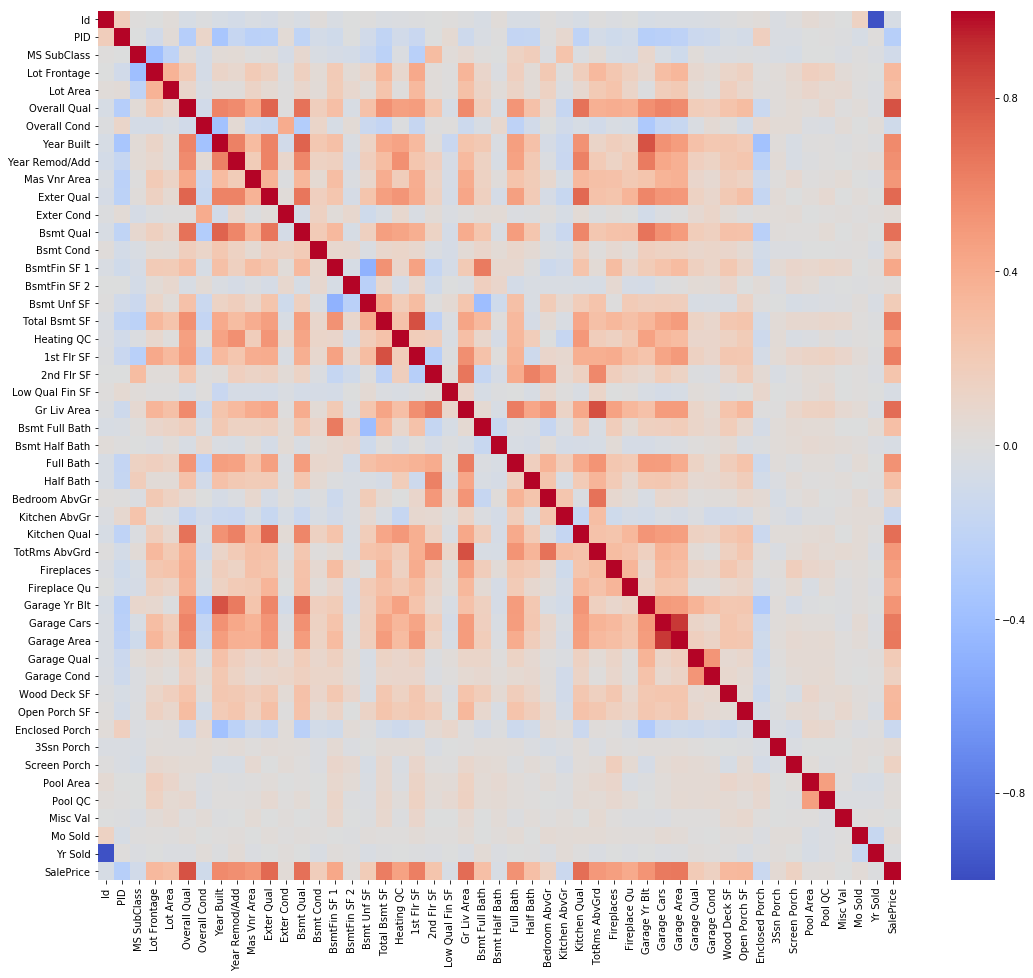

In [45]:
plt.figure(figsize=(18, 16))
sns.heatmap(ames.corr(), vmin=-1, vmax=1, cmap="coolwarm");

There are middling correlations between several of our quantitative factors and the final sale price (bottom row of heatmap), including `Overall Qual`, `Exter Qual`, `Bsmt Qual`, `Gr Liv Area`, and `Kitchen Qual`. Several of these are inter-correlated, for example `Overall Qual` and `Kitchen Qual` ($r=0.676158$).

## Neighborhood analysis

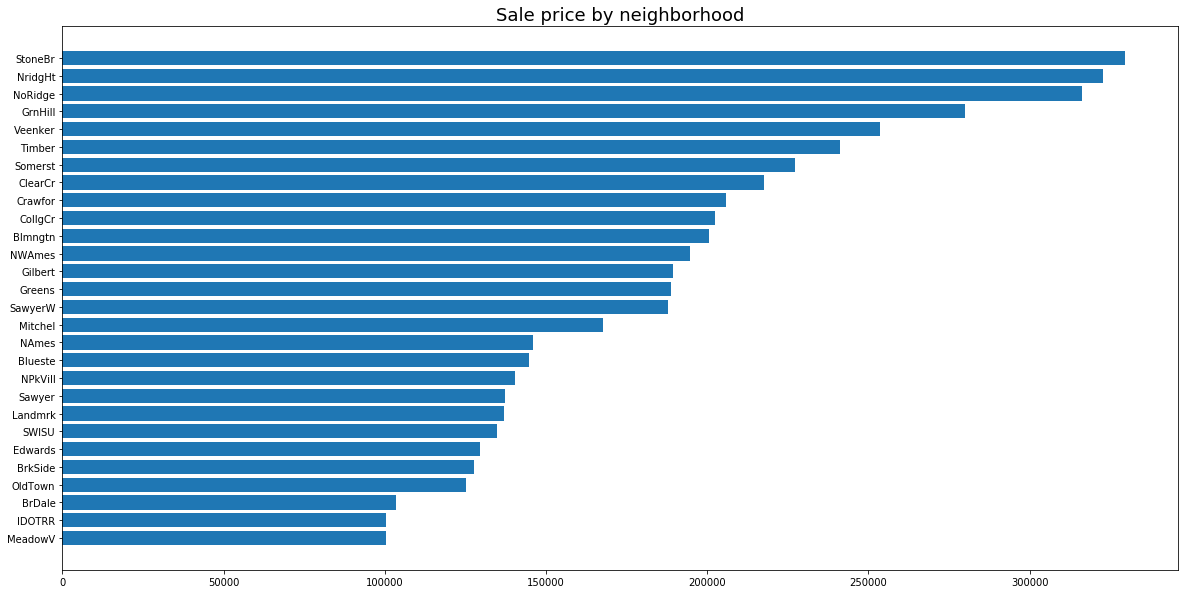

In [46]:
plt.figure(figsize=(20, 10))

hoods = ames[ames["Dataset"]=="train"].groupby("Neighborhood")["SalePrice"].mean().sort_values()

# https://stackoverflow.com/a/47380947
plt.barh(range(len(hoods)), hoods)
plt.title("Sale price by neighborhood", fontsize=18)
plt.yticks(range(len(hoods)), hoods.index);

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


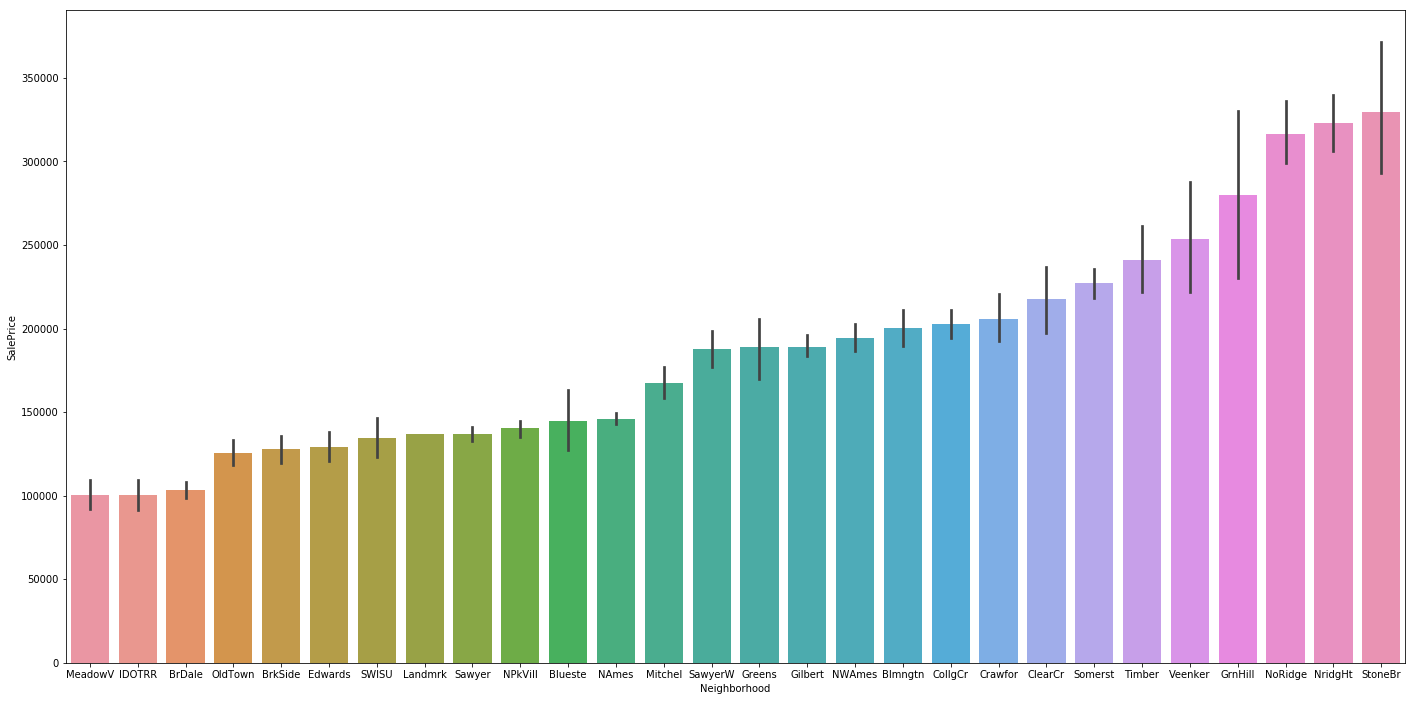

In [47]:
plt.figure(figsize=(24, 12))
sns.barplot("Neighborhood", "SalePrice", data=ames, order=hoods.index);

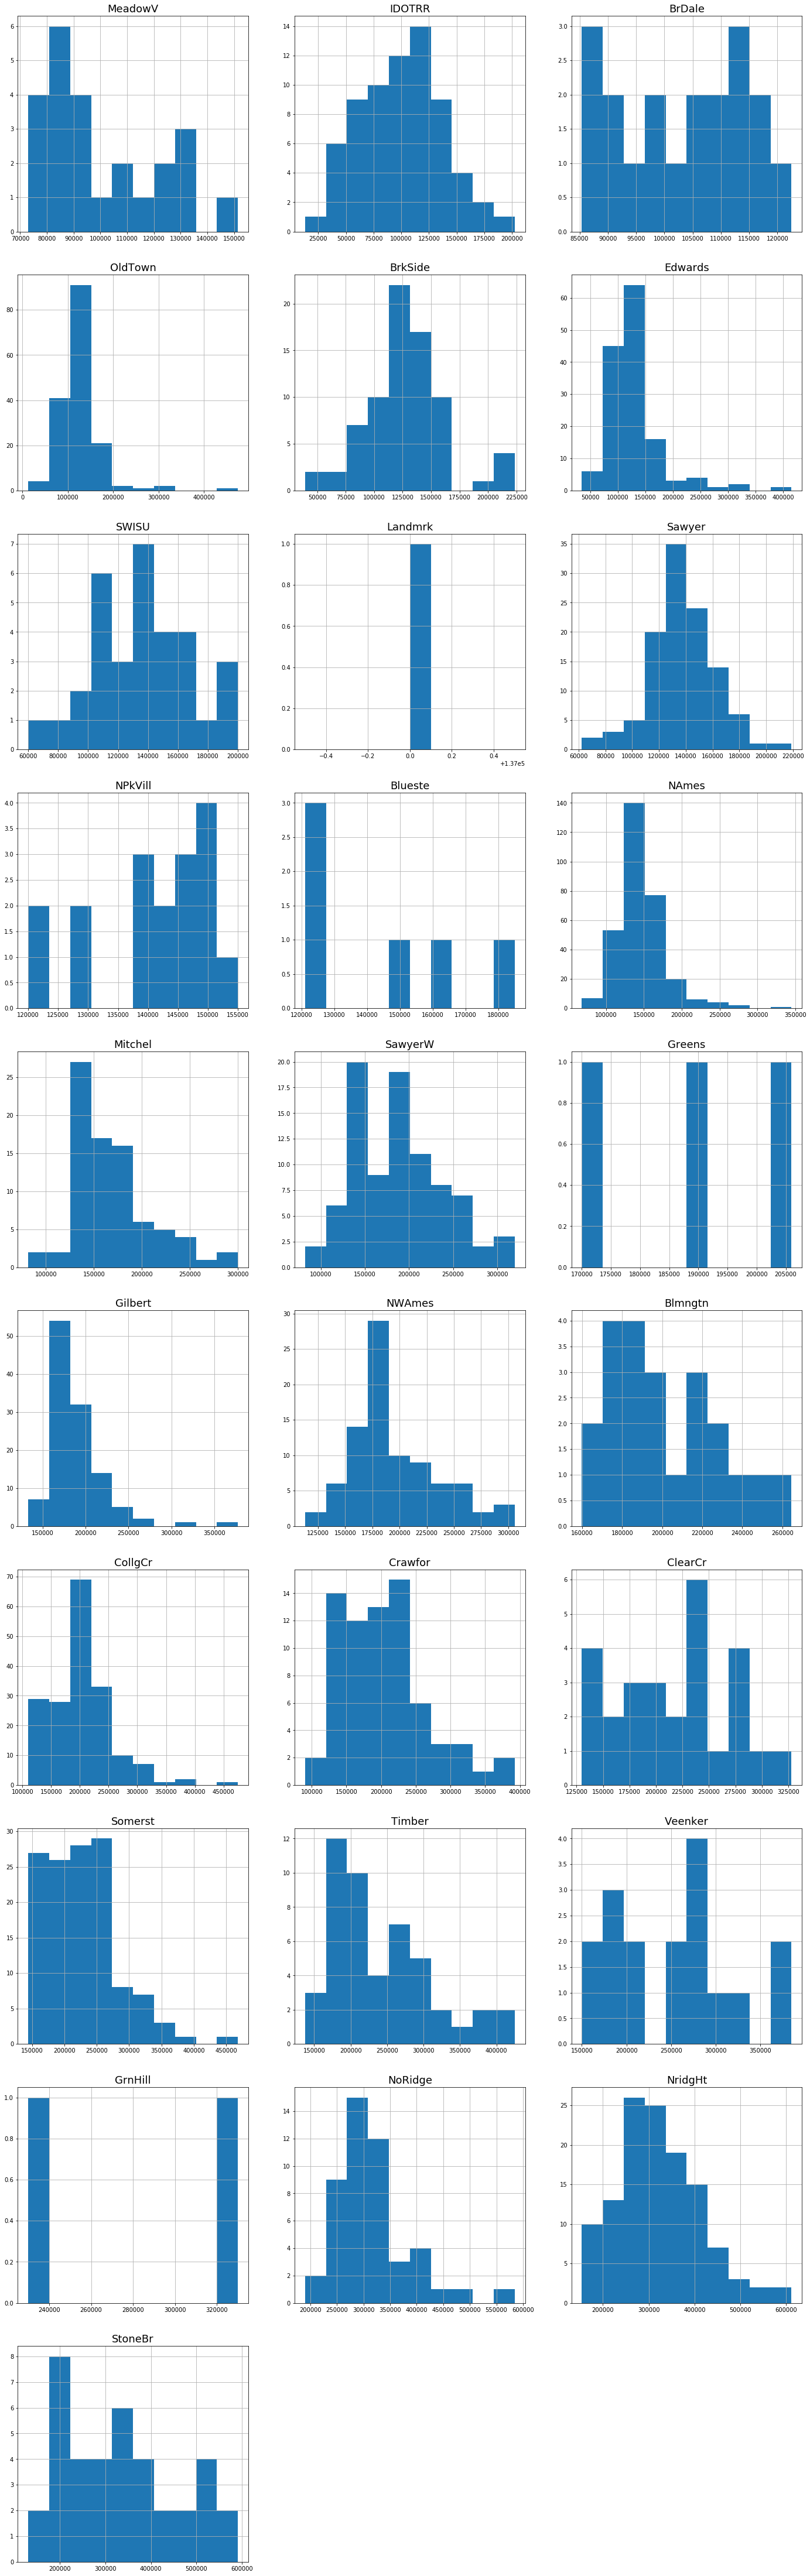

In [48]:
train.sort_values("SalePrice", ascending=False)[["Neighborhood", "SalePrice"]].head(20)

fig = plt.figure(figsize=(24, 80))

for i, hood in enumerate(hoods.index):
    ax = fig.add_subplot(10, 3, i+1)
    plt.title(hood, fontsize=18)
    train[train["Neighborhood"] == hood]["SalePrice"].hist()

## Misc.

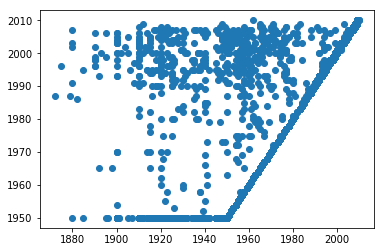

In [49]:
#plt.scatter(ames["Year Remod/Add"], ames["Overall Qual"])

plt.scatter(ames["Year Built"], ames["Year Remod/Add"])

# Model creation & training

## Define baseline model

Baseline RMSE 3585509.16809


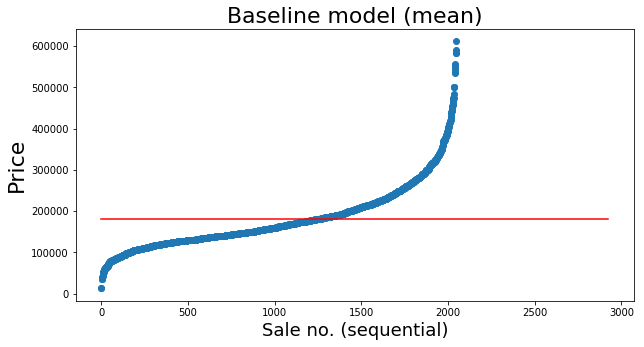

In [50]:
baseline = ames["SalePrice"].mean()
baseline_rmse = np.sqrt(np.sum((ames["SalePrice"] - baseline) ** 2))
print("Baseline RMSE", baseline_rmse)

plt.figure(figsize=(10, 5))
plt.title("Baseline model (mean)", fontsize=22)
plt.xlabel("Sale no. (sequential)", fontsize=18)
plt.ylabel("Price", fontsize=22)
plt.scatter(range(len(ames["SalePrice"])), ames["SalePrice"].sort_values())
plt.plot([0, len(ames["SalePrice"])], [baseline, baseline], color="red");

## Define model

In [51]:
# "N_OldTown", "N_Edwards", "N_Sawyer", "N_NAmes"
# features = [
#     "MS Zoning RL",
#     "Bldg Type 1Fam",
#     "1st Flr SF",
#     "2nd Flr SF",
#     "Overall Qual",
#     "Year Built",
#     "Year Remod/Add",
#     "Exter Qual num"
# ]

features = [
    "Lot Area",
    "Overall Qual",
    "Overall Cond",
#    "Year Built",
#    "Mas Vnr Area",
    "Exter Qual",
    "Bsmt Qual",
    "1st Flr SF",
    "Gr Liv Area",
    "Kitchen AbvGr",
#    "Kitchen Qual",
    "TotRms AbvGrd",
    "Screen Porch",
#    "Pool QC",
#    "Misc Val",
    "Bsmt Full Bath",
#    "Fireplace Qu",
    "Garage Cars",
    "Yr Sold",
#    "Garage Yr Blt",
    "Wood Deck SF",
#    "Bsmt Unf SF",
    "Bsmt Cond",
#    "Lot Frontage",
    "BsmtFin SF 1",
#    "2nd Flr SF",
    "Heating QC",
#    "Garage Area",
#     "Enclosed Porch",
#     "Garage Qual",
#     "Bedroom AbvGr",
#     "Bsmt Half Bath",
#     "Low Qual Fin SF",
#     "Pool Area",
#     "BsmtFin SF 2",
     "Year Remod/Add",
#     "Fireplaces",
#     "Full Bath",
#     "Total Bsmt SF",
#     "3Ssn Porch",
#     "Mo Sold",
#     "Open Porch SF",
#     "Garage Cond",
#     "Half Bath",
#     "Exter Cond",
]

X = train[features]
y = np.log(train["SalePrice"])

# Split for local test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333)

# Instantiate model
model = LinearRegression()

In [52]:
# Fit model
model.fit(X_train, y_train)

# Test model
print("Training score:", model.score(X_train, y_train))
print("Cross-val score:", cross_val_score(model, X_train, y_train, cv=5).mean())
print("Test score:", model.score(X_test, y_test))

Training score: 0.86610596025
Cross-val score: 0.851078186076
Test score: 0.808924844948


In [57]:
# Get outliers
outliers = pd.concat([X, pd.DataFrame(np.exp(model.predict(X)))], axis=1)

# Show outliers against a few non-outliers to get a sense
# of where the model went wrong.
display(np.round(outliers).sort_values(0, ascending=False).head(5).T)

,959,1882,822,1961,1034
Lot Area,6410.0,8740.0,5687.0,9350.0,8450.0
Overall Qual,4.0,7.0,5.0,4.0,5.0
Overall Cond,5.0,5.0,6.0,6.0,6.0
Exter Qual,3.0,4.0,3.0,3.0,3.0
Bsmt Qual,3.0,4.0,3.0,3.0,3.0
1st Flr SF,960.0,864.0,936.0,1169.0,1056.0
Gr Liv Area,960.0,1995.0,1716.0,1531.0,1056.0
Kitchen AbvGr,1.0,1.0,1.0,1.0,1.0
TotRms AbvGrd,5.0,8.0,9.0,8.0,6.0
Screen Porch,0.0,0.0,0.0,0.0,0.0


In [58]:
# Try to figure out what is causing these extreme outliers
for home in [959, 1882]:
    for feature in features:
        
        local_X = train[features]
        local_y = np.log(train["SalePrice"])
        
        # neutralize the offending value
        local_X.loc[home, feature] = local_X[feature].mean()
        
        local_model = LinearRegression()
        local_model.fit(local_X, local_y)
        prediction = np.exp(local_model.predict(pd.DataFrame(local_X.loc[home, :]).T))
        print(f"Prop. {home}, feat. {feature}: {prediction}")

/usr/lib/python3/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Prop. 959, feat. Lot Area: [ 91244.37268201]
Prop. 959, feat. Overall Qual: [ 110131.381219]
Prop. 959, feat. Overall Cond: [ 91768.9808969]
Prop. 959, feat. Exter Qual: [ 91238.12984235]
Prop. 959, feat. Bsmt Qual: [ 93484.30159402]
Prop. 959, feat. 1st Flr SF: [ 92159.32356052]
Prop. 959, feat. Gr Liv Area: [ 97587.28775457]
Prop. 959, feat. Kitchen AbvGr: [ 89813.66111774]
Prop. 959, feat. TotRms AbvGrd: [ 92504.89781702]
Prop. 959, feat. Screen Porch: [ 90791.43984051]
Prop. 959, feat. Bsmt Full Bath: [ 92172.73682619]
Prop. 959, feat. Garage Cars: [ 102774.82686383]
Prop. 959, feat. Yr Sold: [ 91227.40613448]
Prop. 959, feat. Wood Deck SF: [ 90864.50548501]
Prop. 959, feat. Bsmt Cond: [ 90228.16028284]
Prop. 959, feat. BsmtFin SF 1: [ 92233.53327364]
Prop. 959, feat. Heating QC: [ 87759.31209523]
Prop. 959, feat. Year Remod/Add: [ 93752.68738406]
Prop. 1882, feat. Lot Area: [ 214318.07170678]
Prop. 1882, feat. Overall Qual: [ 196233.22579496]
Prop. 1882, feat. Overall Cond: [ 2171

Changing any single factor in the model brings both outliers down to more reasonable predictions and, in fact, the outlier price is almost exactly ten times the actual price. I'm not sure what's going on here, but it looks like an implementation error and not a problem with the model.

# Model testing & evaluation

Growth rate: 35.8104338612 %
Unit increase in Lot Area: 1.00000461651  increase in price
Unit increase in Overall Qual: 1.09653206499  increase in price
Unit increase in Overall Cond: 1.02683825916  increase in price
Unit increase in Exter Qual: 1.04063260025  increase in price
Unit increase in Bsmt Qual: 1.06254994172  increase in price
Unit increase in 1st Flr SF: 1.00009160696  increase in price
Unit increase in Gr Liv Area: 1.00017141262  increase in price
Unit increase in Kitchen AbvGr: 0.917821852157  increase in price
Unit increase in TotRms AbvGrd: 1.01382700664  increase in price
Unit increase in Screen Porch: 1.00040263605  increase in price
Unit increase in Bsmt Full Bath: 1.03303964811  increase in price
Unit increase in Garage Cars: 1.06444742214  increase in price
Unit increase in Yr Sold: 0.996319949695  increase in price
Unit increase in Wood Deck SF: 1.000068957  increase in price
Unit increase in Bsmt Cond: 1.02956167639  increase in price
Unit increase in BsmtFin SF 

array([  4.61649439e-06,   9.21525315e-02,   2.64844299e-02,
         3.98287977e-02,   6.06716247e-02,   9.16027688e-05,
         1.71397931e-04,  -8.57519680e-02,   1.37322857e-02,
         4.02555010e-04,   3.25055709e-02,   6.24558121e-02,
        -3.68683835e-03,   6.89546218e-05,   2.91331548e-02,
         9.07949916e-05,   3.62547778e-02,   1.47975827e-03])

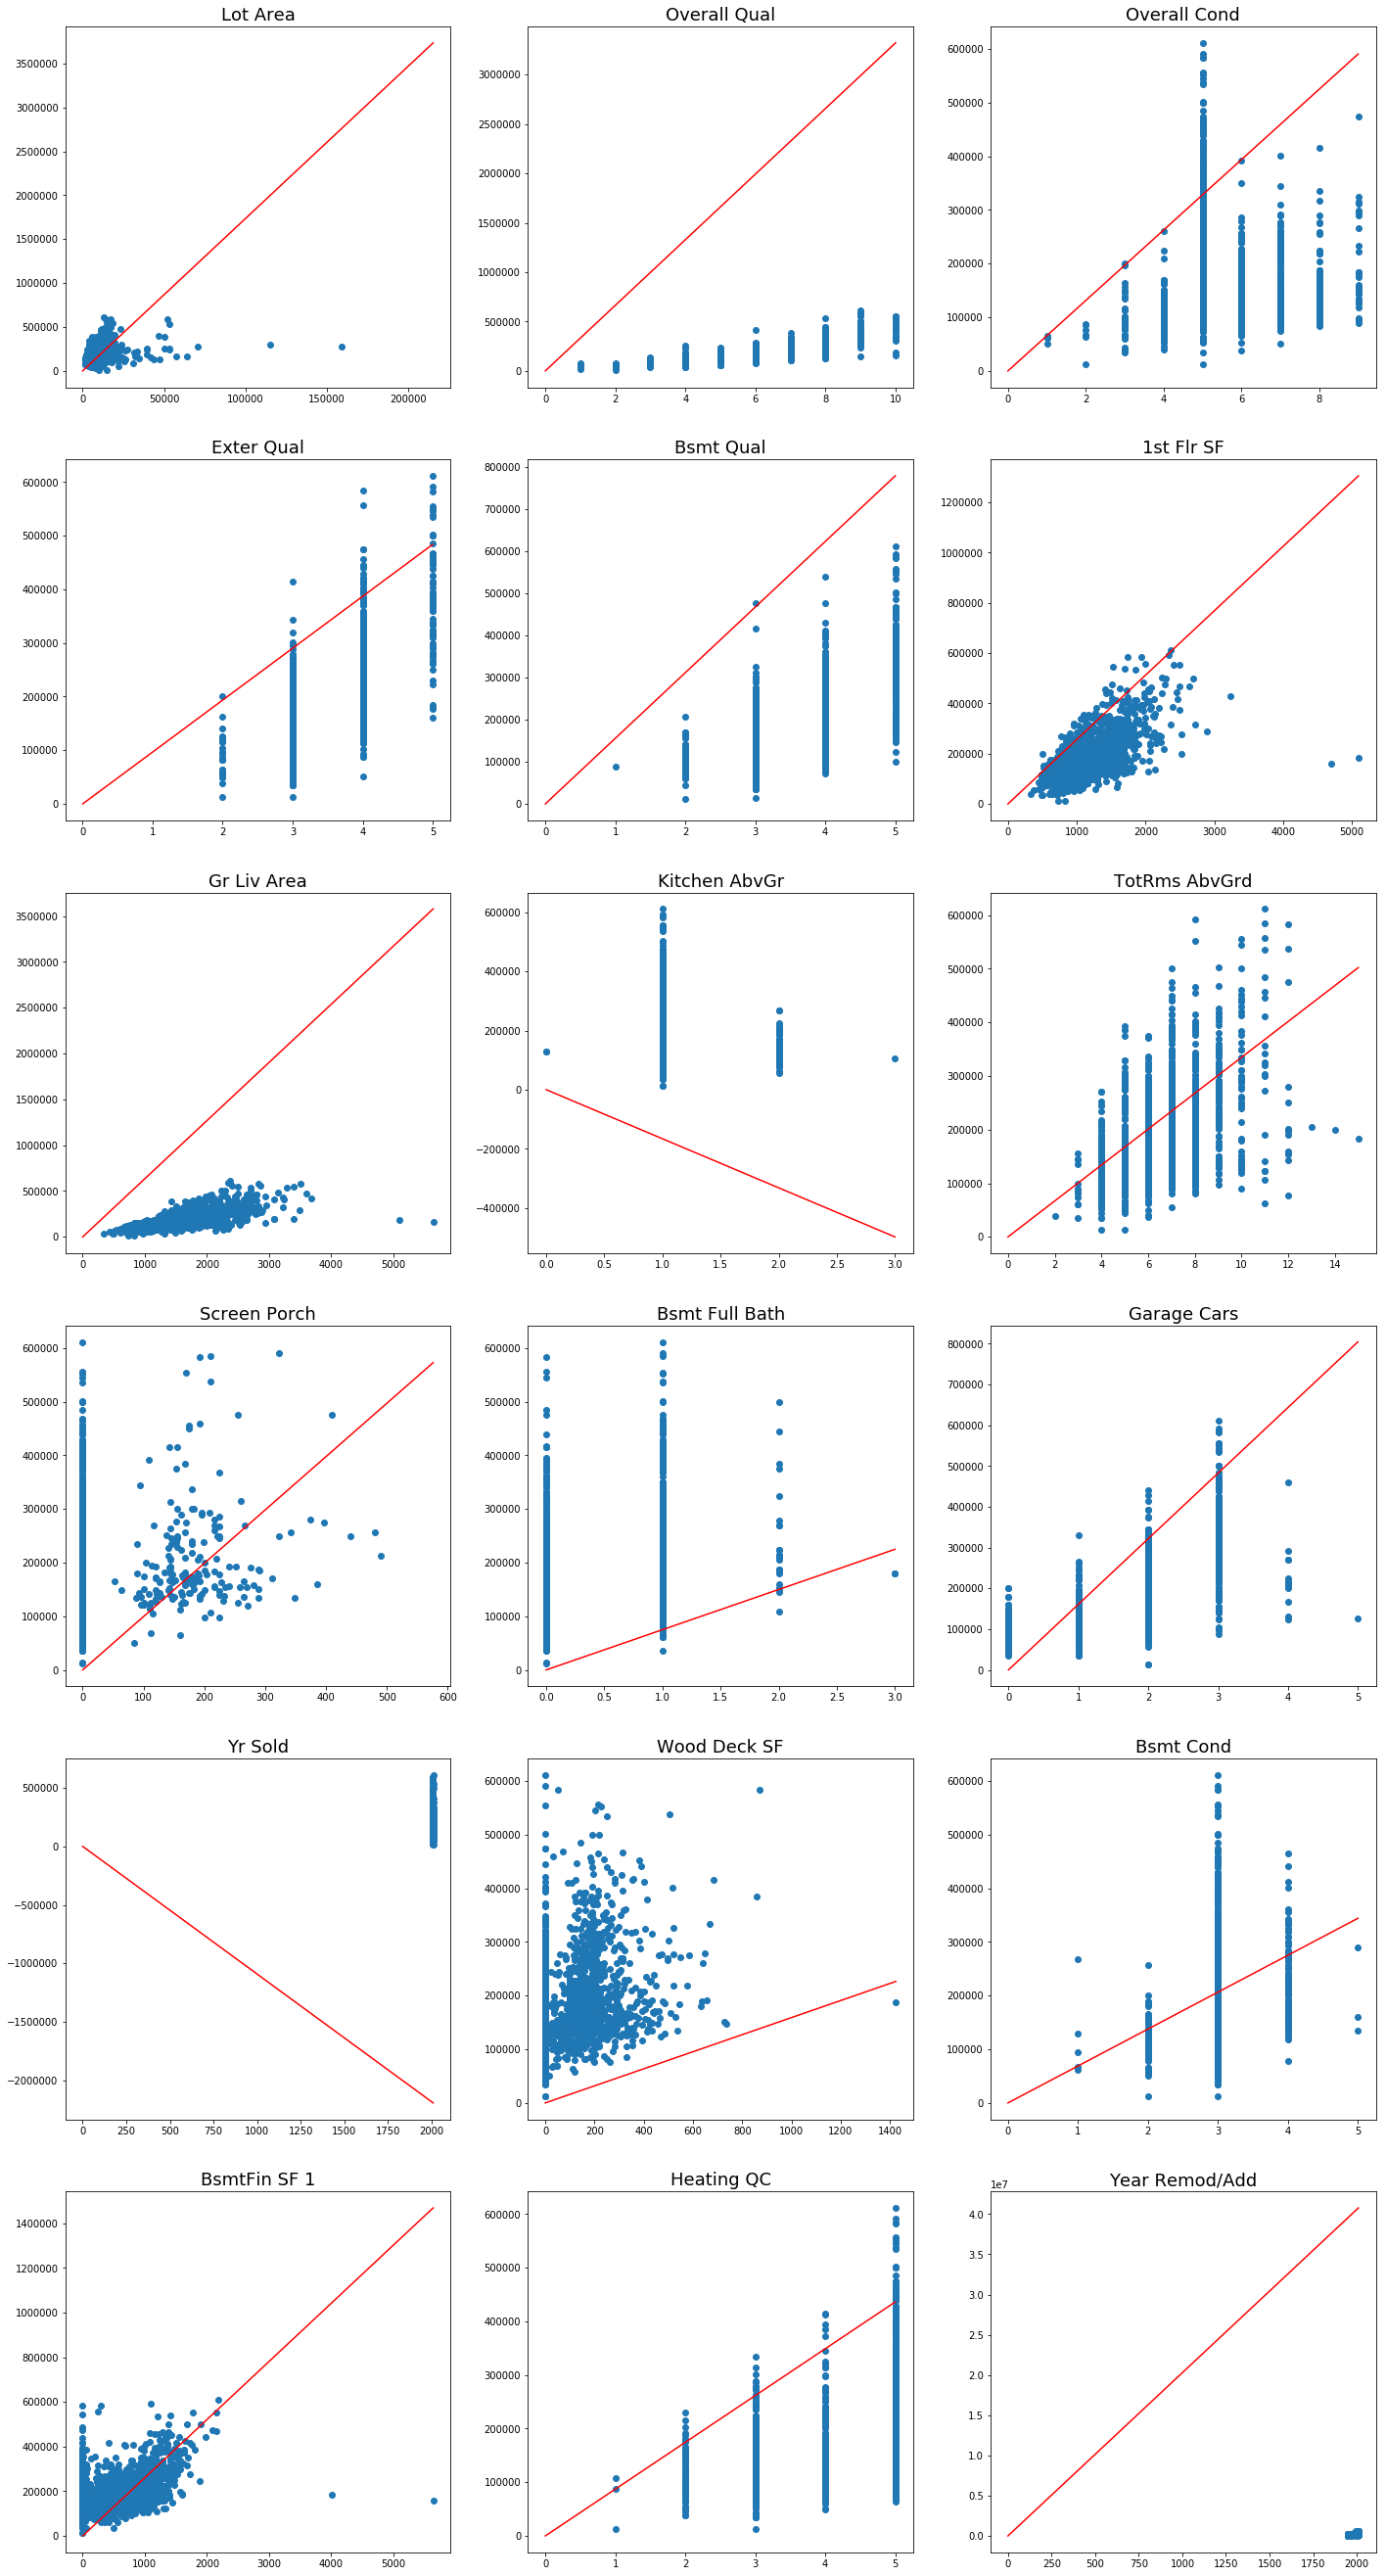

In [59]:
# Get regression-defined growth rates
print("Growth rate:", (np.exp(np.sum(model.coef_)) - 1) * 100, "%")

fig = plt.figure(figsize=(24, 80))

for i, c in enumerate(model.coef_):
    feature = features[i]
    print(f"Unit increase in {feature}:", (np.exp(c)), " increase in price")
    ax = fig.add_subplot(10, 3, i+1)
    ax.set_title(feature, fontsize=18)
    ax.scatter(ames[feature], ames["SalePrice"])
    ax.plot(
        [0, max(ames[feature])],
        [0,
         np.exp(max(ames[feature]) * c + model.intercept_) - np.exp(model.intercept_)],
        color="red"
    )
model.coef_

In [60]:
model.score(X_train, y_train)

0.86610596025046183

In [62]:
y_preds = model.predict(X)
rmse = np.sqrt(mean_squared_error(np.exp(y), np.exp(y_preds)))

print("RMSE =", rmse)

RMSE = 55297.6802858


In [63]:
# Get p-values
sm_model = sm.OLS(y_train, X_train).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.645e+05
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:28:07   Log-Likelihood:                 627.46
No. Observations:                1366   AIC:                            -1219.
Df Residuals:                    1348   BIC:                            -1125.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Lot Area        4.618e-06   8.25e-07      5.595      0.000       3e-06    6.24e-06
Overall Qual       0.0924      0.005     17.254      0.000       0.082       0.103
Overall Cond       0.0256      0.004      6.039      0.000       0.017       0.034
Exter Qual         0.0390      0.012      3.280      0.001       0.016       0.062
Bsmt Qual          0.0603      0.010      6.141      0.000       0.041       0.080
1st Flr SF      9.233e-05   1.55e-05      5.943      0.000    6.19e-05       0.000
Gr Liv Area        0.0002   1.78e-05      9.604      0.000       0.000       0.000
Kitchen AbvGr     -0.0863      0.023     -3.827      0.000      -0.131      -0.042
TotRms AbvGrd      0.0136      0.005      2.691      0.007       0.004       0.024
Screen Porch       0.0004   7.93e-05      5.197      0.000       0.000       0.001
Bsmt Full Bath     0.0325      0.011      3.026      0.003       0.011       0.054
Garage Cars        0.0620      0.007      8.391      0.000       0.048       0.077
Yr Sold            0.0036      0.000     12.931      0.000       0.003       0.004
Wood Deck SF    6.889e-05   3.59e-05      1.916      0.056   -1.63e-06       0.000
Bsmt Cond          0.0315      0.014      2.185      0.029       0.003       0.060
BsmtFin SF 1    8.972e-05   1.34e-05      6.704      0.000    6.35e-05       0.000
Heating QC         0.0361      0.006      6.519      0.000       0.025       0.047
Year Remod/Add     0.0015      0.000      5.182      0.000       0.001       0.002
==============================================================================
Omnibus:                     1148.658   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82314.548
Skew:                          -3.432   Prob(JB):                         0.00
Kurtosis:                      40.405   Cond. No.                     6.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# how can your model be used for inference?
# why do you believe your model will generalize to new data?

# Graphs and data export

In [65]:
# Define color scheme
ames_red = "#fa2c14"
ames_yellow = "#e9a100"
ames_orange = "#f16118"
ames_green = "#314e14"

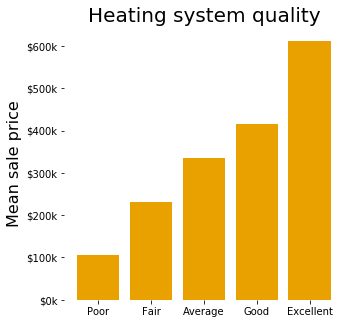

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(
    train[train["Heating QC"].notna()]["Heating QC"],
    train[train["Heating QC"].notna()]["SalePrice"] / 1000,
    color=ames_yellow
)
ax.set_xticklabels(["", "Poor", "Fair", "Average", "Good", "Excellent"])
ax.set_title("Heating system quality", fontsize=20)
#ax.set_xlabel("Type", fontsize=16)
ax.set_ylabel("Mean sale price", fontsize=16)
ax.yaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("graphs/Corr-heating.svg", transparent=True, bbox_inches="tight")

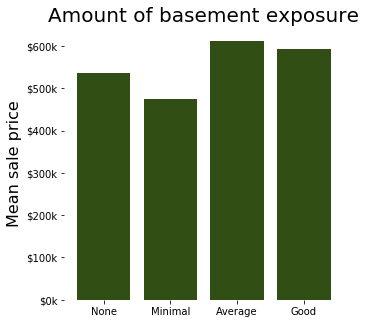

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(
    train[train["Bsmt Exposure"].notna()]["Bsmt Exposure"],
    train[train["Bsmt Exposure"].notna()]["SalePrice"] / 1000,
    color=ames_green
)
ax.set_xticklabels(["Good", "Average", "Minimal", "None"])
ax.set_title("Amount of basement exposure", fontsize=20)
#ax.set_xlabel("Type", fontsize=16)
ax.set_xlim(ax.get_xlim()[::-1]) # https://stackoverflow.com/a/2052799
ax.set_ylabel("Mean sale price", fontsize=16)
ax.yaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("graphs/Corr-bsmt.svg", transparent=True, bbox_inches="tight")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


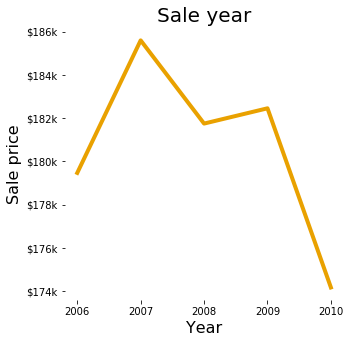

In [68]:
train["YrMo"] = train[train["Yr Sold"].notna()]["Yr Sold"] + train[train["Yr Sold"].notna()]["Mo Sold"] / 12

yr = train.groupby("Yr Sold")["SalePrice"].mean()
yrmo = train.groupby("YrMo")["SalePrice"].mean()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(
    yr.index,
    yr / 1000,
    color=ames_yellow,
    linewidth=4
)
ax.set_xticks(range(2006, 2011))
ax.set_title("Sale year", fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Sale price", fontsize=16)
ax.yaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("graphs/Corr-yearsold.svg", transparent=True, bbox_inches="tight")

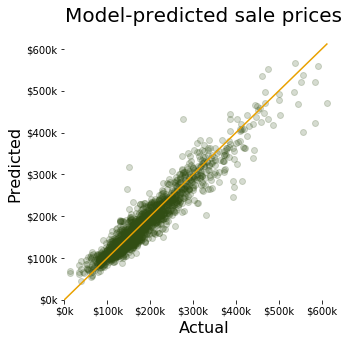

In [131]:
# Get predicted outputs
y_preds = model.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(
    np.exp(y) / 1000,
    np.exp(y_preds) / 1000,
    color=ames_green, alpha=0.2) # show predicted vs. actual values
ax.plot(
    [0, np.exp(np.max(y)) / 1000],
    [0, np.exp(np.max(y)) / 1000],
    color=ames_yellow); # show line representing model
ax.set_title("Model-predicted sale prices", fontsize=20)
ax.set_xlabel("Actual", fontsize=16)
ax.set_ylabel("Predicted", fontsize=16)
ax.set_xlim(0, 650)
ax.set_ylim(0, 650)
ax.xaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.yaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("graphs/Model-predictions-nooutliers.png", transparent=True, bbox_inches="tight", dpi=150)

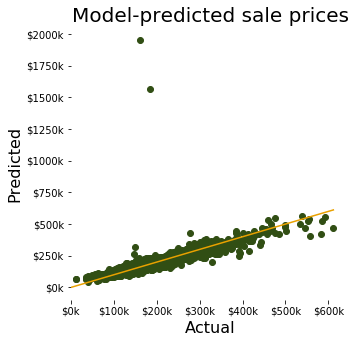

In [89]:
# Get predicted outputs
y_preds = model.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(
    np.exp(y) / 1000,
    np.exp(y_preds) / 1000,
    color=ames_green) # show predicted vs. actual values
ax.plot(
    [0, np.exp(np.max(y)) / 1000],
    [0, np.exp(np.max(y)) / 1000],
    color=ames_yellow); # show line representing model
ax.set_title("Model-predicted sale prices", fontsize=20)
ax.set_xlabel("Actual", fontsize=16)
ax.set_ylabel("Predicted", fontsize=16)
ax.set_xlim(0, 650)
#ax.set_ylim(0, 650)
ax.xaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.yaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("graphs/Model-predictions-outliers.svg", transparent=True, bbox_inches="tight")

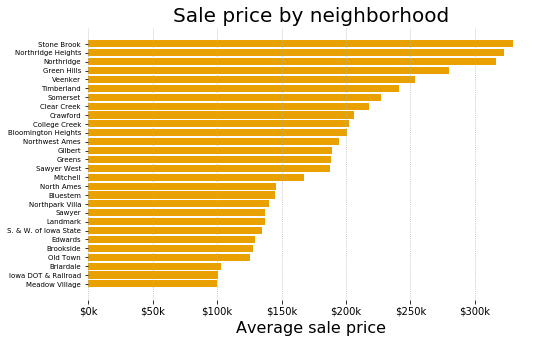

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.barh(
    range(len(hoods)),
    hoods / 1000,
    color=ames_yellow) # show predicted vs. actual values
ax.set_title("Sale price by neighborhood", fontsize=20)
#ax.set_xlabel("Actual", fontsize=16)
ax.set_yticks(range(len(hoods)))
ax.set_yticklabels([
    "Meadow Village",
    "Iowa DOT & Railroad",
    "Briardale",
    "Old Town",
    "Brookside",
    "Edwards",
    "S. & W. of Iowa State",
    "Landmark",
    "Sawyer",
    "Northpark Villa",
    "Bluestem",
    "North Ames",
    "Mitchell",
    "Sawyer West",
    "Greens",
    "Gilbert",
    "Northwest Ames",
    "Bloomington Heights",
    "College Creek",
    "Crawford",
    "Clear Creek",
    "Somerset",
    "Timberland",
    "Veenker",
    "Green Hills",
    "Northridge",
    "Northridge Heights",
    "Stone Brook"
], fontsize=7)
ax.set_xlabel("Average sale price", fontsize=16)
#ax.set_xlim(0, 650)
#ax.set_ylim(0, 650)
#ax.xaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.xaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, axis="x", ls=":")

plt.savefig("graphs/Neighborhoods.svg", transparent=True, bbox_inches="tight")

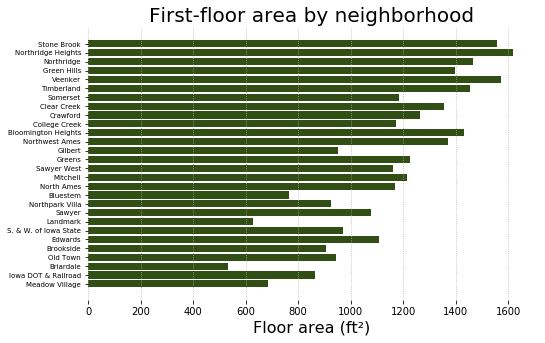

In [124]:
hoods_area = ames[ames["Dataset"]=="train"].groupby("Neighborhood")["1st Flr SF"].mean().sort_values()

hoods_area = hoods_area[["MeadowV", "IDOTRR", "BrDale", "OldTown", "BrkSide", "Edwards", "SWISU", "Landmrk", "Sawyer", "NPkVill", "Blueste", "NAmes", "Mitchel", "SawyerW", "Greens", "Gilbert", "NWAmes", "Blmngtn", "CollgCr", "Crawfor", "ClearCr", "Somerst", "Timber", "Veenker", "GrnHill", "NoRidge", "NridgHt", "StoneBr"]]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.barh(
    range(len(hoods_area)),
    hoods_area,
    color=ames_green) # show predicted vs. actual values
ax.set_title("First-floor area by neighborhood", fontsize=20)
#ax.set_xlabel("Actual", fontsize=16)
ax.set_yticks(range(len(hoods_area)))
ax.set_yticklabels([
    "Meadow Village",
    "Iowa DOT & Railroad",
    "Briardale",
    "Old Town",
    "Brookside",
    "Edwards",
    "S. & W. of Iowa State",
    "Landmark",
    "Sawyer",
    "Northpark Villa",
    "Bluestem",
    "North Ames",
    "Mitchell",
    "Sawyer West",
    "Greens",
    "Gilbert",
    "Northwest Ames",
    "Bloomington Heights",
    "College Creek",
    "Crawford",
    "Clear Creek",
    "Somerset",
    "Timberland",
    "Veenker",
    "Green Hills",
    "Northridge",
    "Northridge Heights",
    "Stone Brook"
], fontsize=7)
ax.set_xlabel("Floor area (ft²)", fontsize=16)
#ax.set_xlim(0, 650)
#ax.set_ylim(0, 650)
#ax.xaxis.set_major_formatter(FormatStrFormatter('$%dk'))
#ax.xaxis.set_major_formatter(FormatStrFormatter('$%dk'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, axis="x", ls=":")

plt.savefig("graphs/Neighborhoods-fl-area.svg", transparent=True, bbox_inches="tight")

In [71]:
# Write out data
pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": np.exp(model.predict(test[features]))
}).to_csv("datasets/kaggle.csv", index=False)

# References

Norman, Geoff. 2010. “Likert Scales, Levels of Measurement and the ‘Laws’ of Statistics.” *Advances in Health Sciences Education* 15: 625–32. doi:[10.1007/s10459-010-9222-y](https://doi.org/10.1007/s10459-010-9222-y).